In [453]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *
from assigners import *
from effect_estimators import *
from design_matrices import *
from experimental import *

In [33]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

In [569]:
fnum=3
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [455]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2])

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

In [313]:
fnum=1
pathGF = "../../../PARKINSONS/PDproj/plasmadata/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/plasmaresults/ttest/mv_32/pori0.05_FC0.5/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

plasmaHILICposGFstatus_log2.csv
plasmaHILICposGFstatus_pori_var0.06FC0.5.csv


In [314]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2,3], ' ')

Area = data_significant.iloc[4:,8:80]
groups = data.iloc[1,8:80]
gender = data.iloc[0,8:80]
labels = LabelEncoder().fit_transform(groups)

In [456]:
Area.shape

(56, 40)

In [457]:
df_select.head()

,compound,masstime,test,p_orig,p_FDR,p_Bonf,FC,ms,gaps1,gaps2
0,D-(+)-Tryptophan,203.08233@2.933,comb.--UT,0.0,0.0,0.0,-4.431005,3.610911,0,0
1,D-(+)-Tryptophan,203.08233@2.933,aSYN--comb.,0.0,0.0,0.0,4.747226,3.783463,0,0
2,"[(2R,3S,4R,5R)-5-(6-Amino-9H-purin-9-yl)-3,4-d...",558.06513@0.598,comb.--UT,0.0,0.0,0.0,5.735628,4.723783,0,6
3,"[(2R,3S,4R,5R)-5-(6-Amino-9H-purin-9-yl)-3,4-d...",558.06513@0.598,aSYN--comb.,0.0,0.0,0.0,-5.641455,3.859271,7,0
4,D-(+)-Tryptophan,203.08233@2.933,aSYN--INFg,0.0,0.0,0.0,4.624380,3.170385,0,0


In [458]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
295,NaN,C8 H18 N6 O4 P2,1.57,324.08698,323.07971,0.562,No MS2,[M-H]-1,12.969079787589035,13.058210384136459,...,128,128,128,8,128,8,8,8,8,8
128,NaN,C13 H29 O18 P3,-1.48,566.05583,565.04856,0.565,No MS2,[M-H]-1,18.011371464807823,16.92328857211073,...,128,0,0,0,0,0,0,0,0,0
50,Inosinic acid,C10 H13 N4 O8 P,3.14,348.04819,347.04092,0.598,No MS2,[M-H]-1,18.4864526524781,19.02292696665564,...,128,128,128,128,128,128,128,128,128,128
96,"[(2R,3S,4R,5R)-5-(6-Amino-9H-purin-9-yl)-3,4-d...",C15 H23 N5 O14 P2,1.31,559.0724,558.06513,0.598,No MS2,[M-H]-1,13.562184272328183,13.722500605954007,...,128,32,32,128,32,32,32,32,8,8
284,NaN,C21 H27 N7 O12 P2,1.46,631.12021,630.11294,0.603,No MS2,[M-H]-1,13.053532666115915,13.12755139515039,...,32,128,128,128,8,8,8,128,128,128


In [318]:
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]

In [459]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]

In [460]:
cols=np.arange(5)
feature_ids = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])]

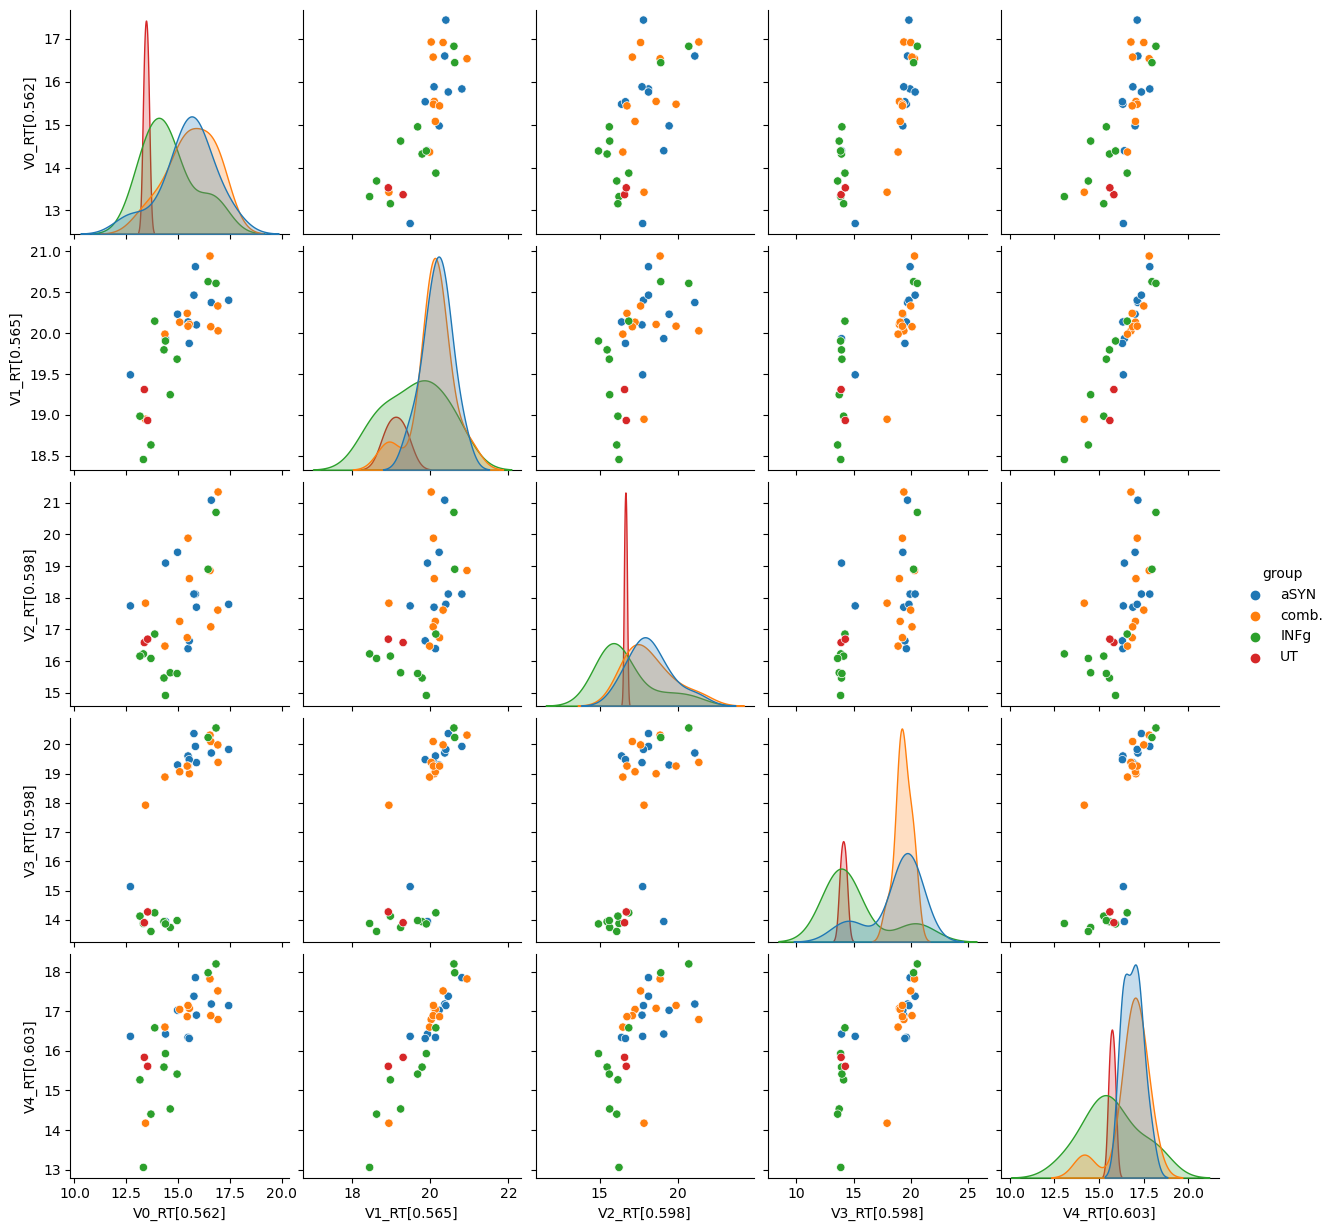

In [461]:
complete_pairplot(X[:,cols], groups, feature_ids)

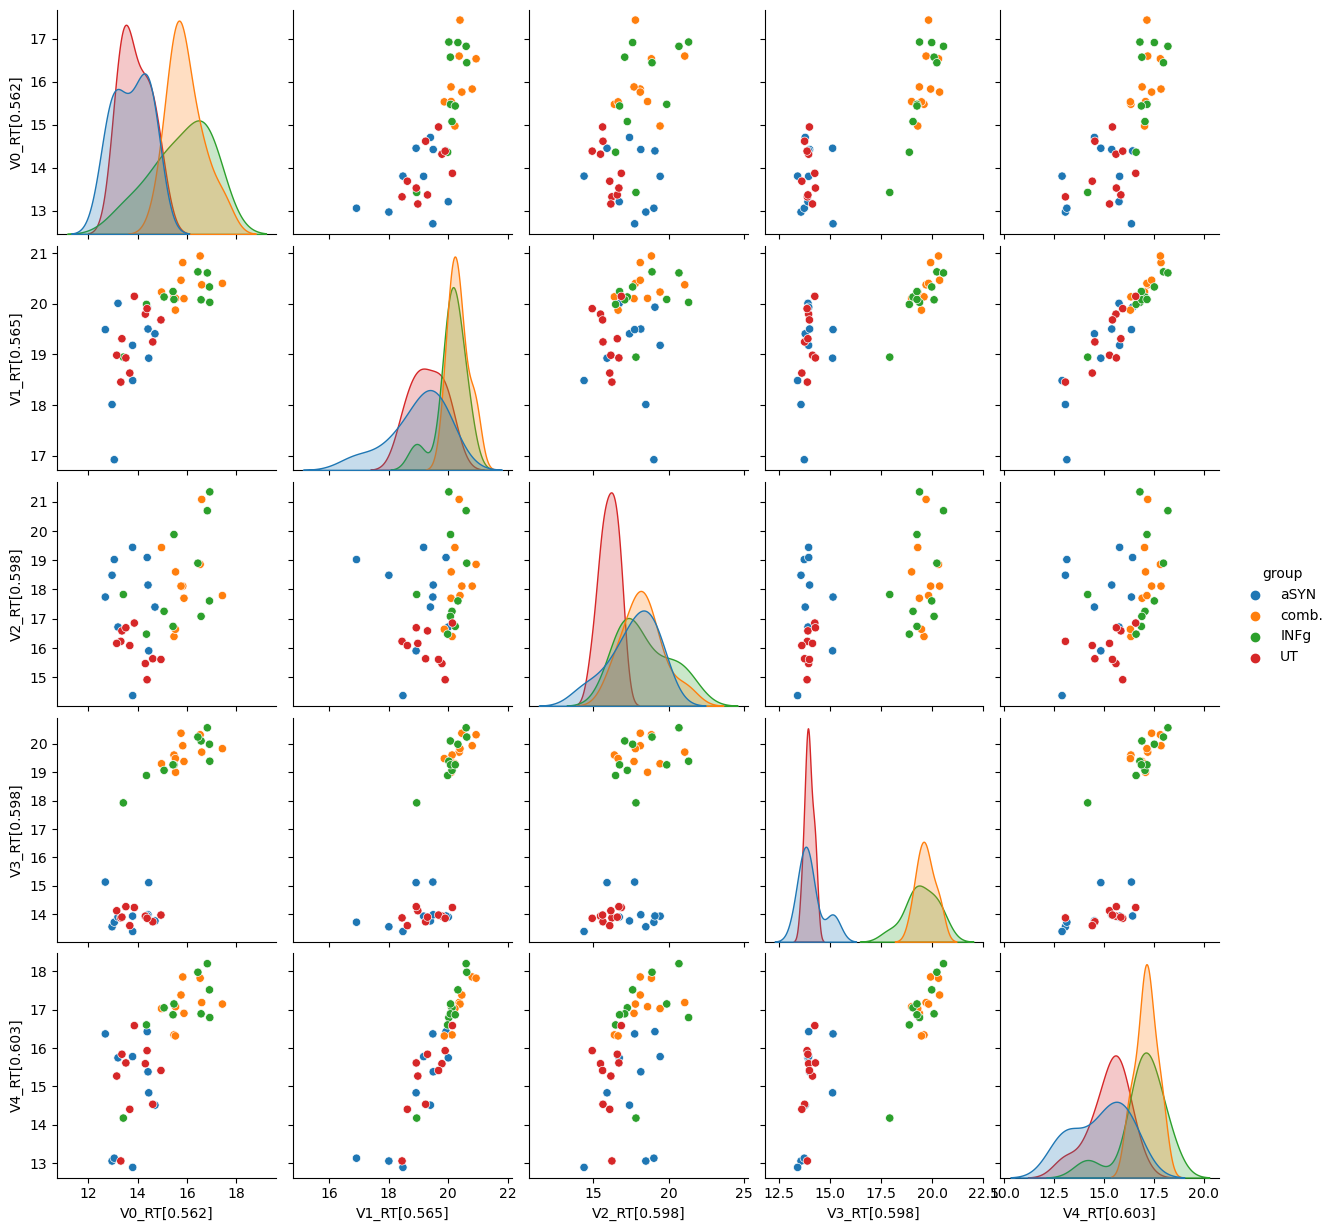

In [170]:
df_X = pd.DataFrame(X[:,cols], columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])])
df_X['group'] = groups.to_numpy(dtype=str)
complete_pairplot(df_X, group_col='group')

### ---------------------------------------------------------

In [319]:
data_X=data_significant.iloc[sorted_ind+4,:80]
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)

In [462]:
data_X=data_significant.iloc[sorted_ind+3,:48]
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)

In [463]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T)
COR = np.cov(X_std.T, ddof=0)

In [464]:
# make a mask matrix by zeroing out all features whose times are not within dt=0.1 of each other
dt = 0.1
D_times = times[:,np.newaxis]-times[np.newaxis,:]
mask = np.abs(D_times) <= dt

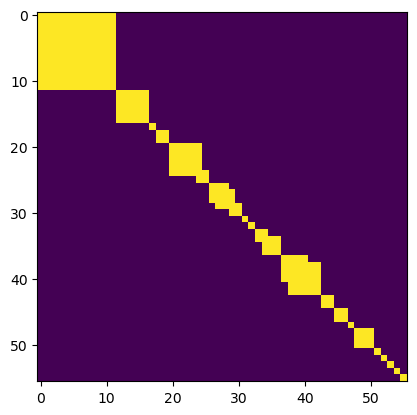

In [465]:
plt.imshow(mask)

In [466]:
# Make a distance matrix from the correlation matrix COR
mask = np.ones_like(COR)
CD = 1 - mask*COR
# make sure the diagonal is zero and the matrix is PD
CD = np.maximum(CD, CD.T)
CD -= np.diag(CD.diagonal())
CD=np.clip(CD,0,2)
cd_matrix = squareform(CD,force='tovector')

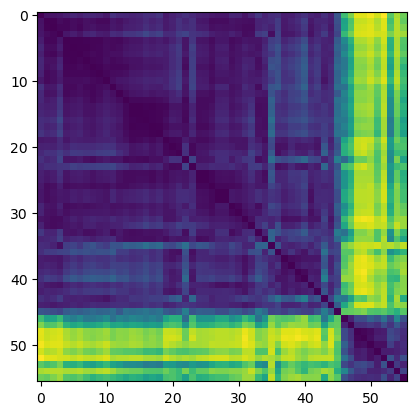

In [467]:
plt.imshow(VAT(CD))

In [216]:
import pyclustertend

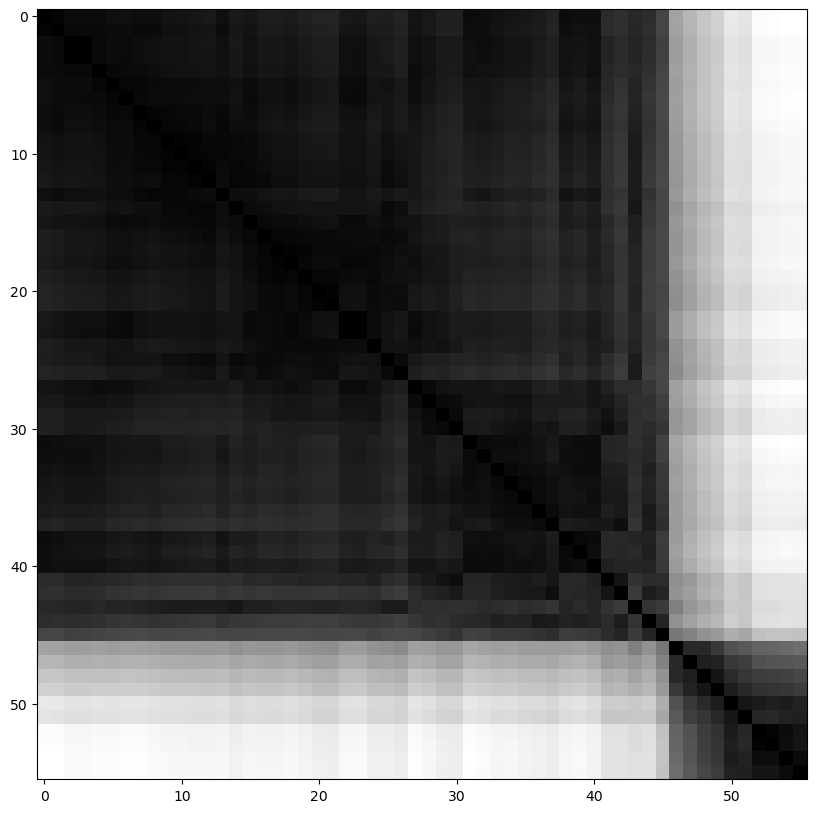

In [468]:
pyclustertend.vat(CD)

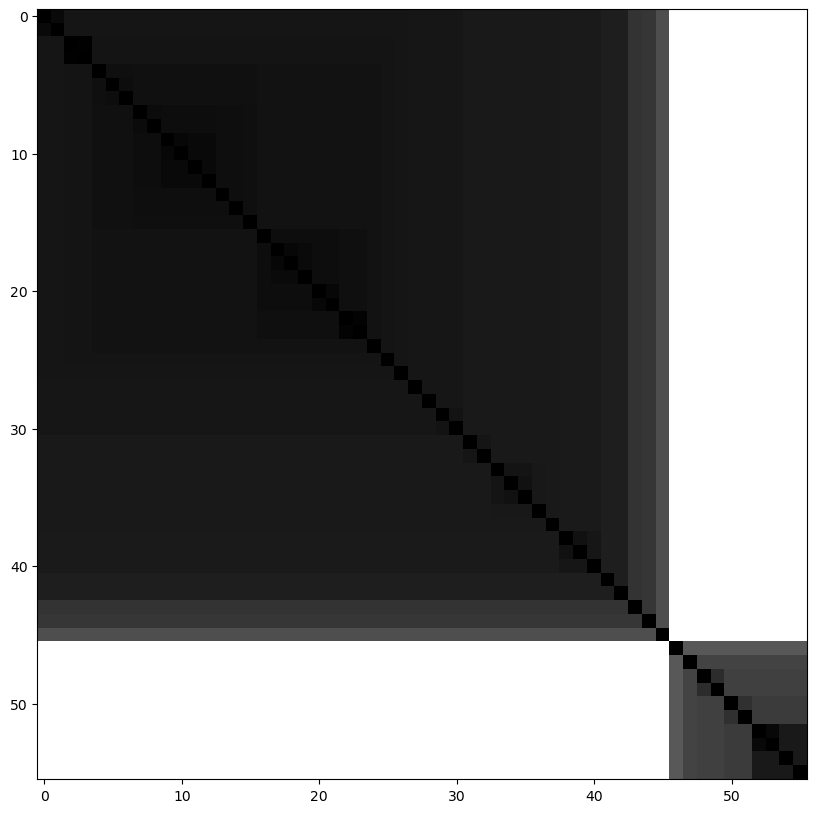

In [469]:
pyclustertend.ivat(CD)

In [470]:
cd_matrix.shape

(1540,)

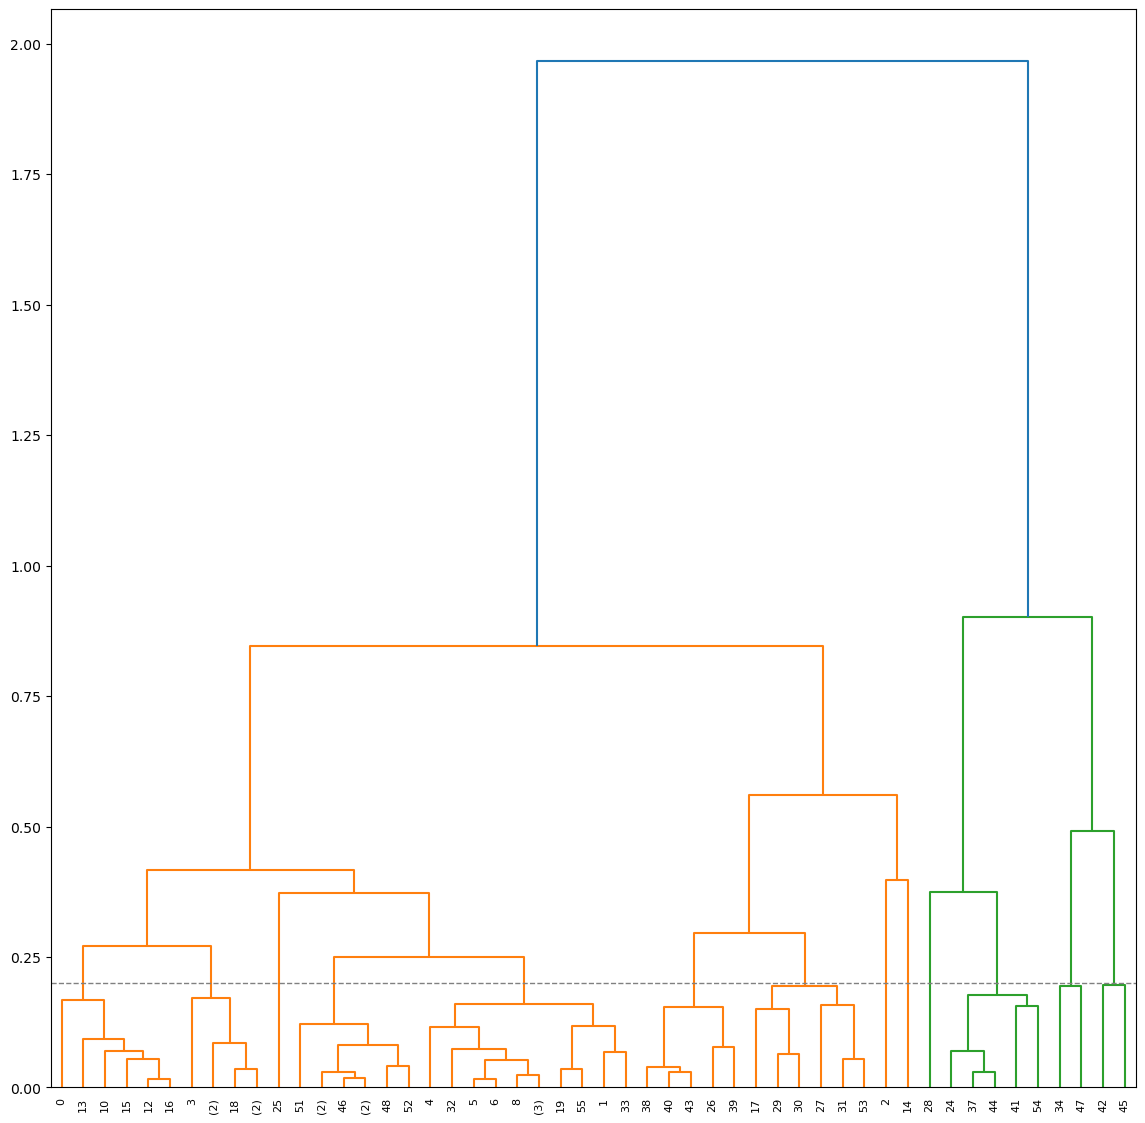

In [471]:
plt.figure(figsize=(14,14))
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=50, labels=np.asarray(np.arange(CD.shape[0])))
plt.axhline(y=0.2, c='grey', lw=1, linestyle='dashed')
labels_complete=hierarchy.fcluster(link_complete, t=0.2, criterion='distance')

In [472]:
labels_complete

array([ 1,  4,  8,  2,  4,  4,  4,  4,  4,  4,  1,  4,  1,  1,  9,  1,  1,
        7,  2,  4,  2,  2,  2,  2, 10,  5,  6,  7, 11,  7,  7,  7,  4,  4,
       12,  3,  3, 10,  6,  6,  6, 10, 13,  6, 10, 13,  3, 12,  3,  3,  3,
        3,  3,  7, 10,  4], dtype=int32)

In [473]:
np.unique(labels_complete).shape

(13,)

In [474]:
inds=np.argsort(labels_complete)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_complete[inds]
luniq=np.unique(labels_complete[inds])

C:\Users\paavo\AppData\Local\Temp\ipykernel_10092\729970858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['labels_complete']=labels_complete[inds]


In [475]:
k=luniq[0]
cluster_ind = np.where(labels_complete[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
#cluster = result.iloc[cluster_ind,8:80].to_numpy(dtype=float).T

df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[0.562 0.913 0.912 0.897 0.862 0.61 ]


In [476]:
#complete_pairplot(df_cluster.iloc[:,:-1].to_numpy(dtype=float), group_col=gender, kind='kde', palette=None)

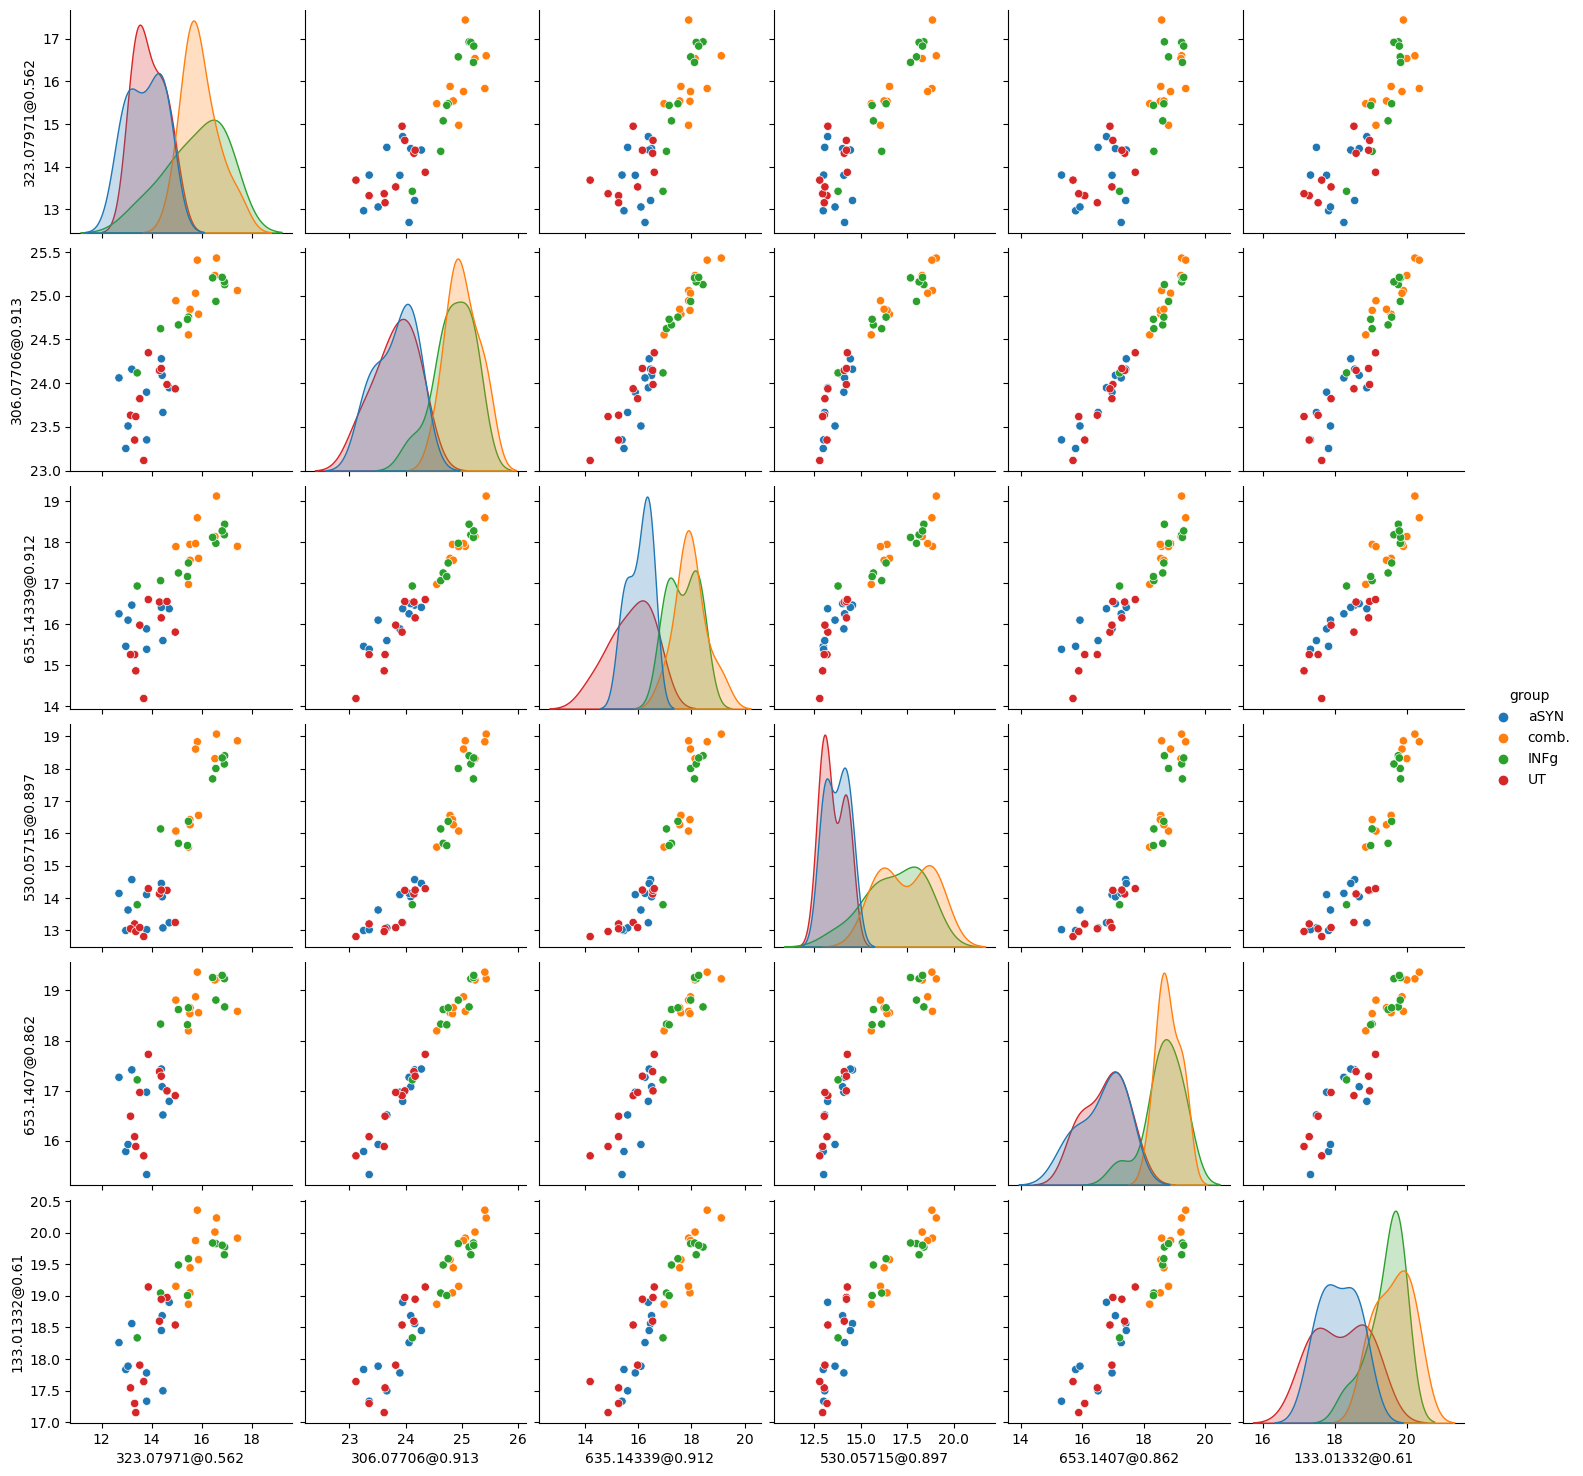

In [477]:
complete_pairplot(df_cluster, group_col='group', kind='kde', palette=None)

In [478]:
cluster_names

array(['nan', 'Reduced Glutathione', 'nan', 'nan', 'nan', 'nan'],
      dtype='<U19')

In [479]:
cluster_masstimes

['323.07971@0.562',
 '306.07706@0.913',
 '635.14339@0.912',
 '530.05715@0.897',
 '653.1407@0.862',
 '133.01332@0.61']

### Check the pvalues and tests for each peak (id'd by masstime)

In [482]:
mts, ps, ts, es = extract_pvalues(df_select,cluster_masstimes, pvalue_col=' p_FDR',head='')
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, es, tle)

cellsRPnegALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 1
-----------------------
Peak: 323.07971@0.562
P-values: [0.00097, 0.000993, 0.039171]
Tests: ['aSYN--comb.', 'comb.--UT', 'aSYN--INFg']
Effects: [-2.204715, 2.035897, -1.993876]
-----------------------
Peak: 306.07706@0.913
P-values: [0.000232, 0.000414, 0.001386, 0.001848]
Tests: ['aSYN--comb.', 'comb.--UT', 'aSYN--INFg', 'INFg--UT']
Effects: [-1.190763, 1.199859, -1.031581, 1.040676]
-----------------------
Peak: 635.14339@0.912
P-values: [0.000232, 0.000815, 0.000976, 0.002738]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-1.922021, -1.641015, 2.245379, 1.964373]
-----------------------
Peak: 530.05715@0.897
P-values: [0.000993, 0.001471, 0.007032, 0.010608]
Tests: ['comb.--UT', 'aSYN--comb.', 'INFg--UT', 'aSYN--INFg']
Effects: [3.93463, -3.732994, 3.295271, -3.093636]
-----------------------
Peak: 653.1407@0.862
P-values: [0.000509, 0.000865, 0.001461, 0.001598]
Tests: ['comb.--UT', 'aSYN--comb.', 'INF

## NOISE

In [597]:
i1=np.arange(10)
i2=np.arange(10,20)
i3=np.arange(20,30)
i4=np.arange(30,40)
I=[i1,i2,i3,i4]

In [688]:
fnum=5
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

fname = filenamesGF[fnum].split('GF')[0]

cellslipidposGFstatus.csv


cellsRPnegGFstatus.csv


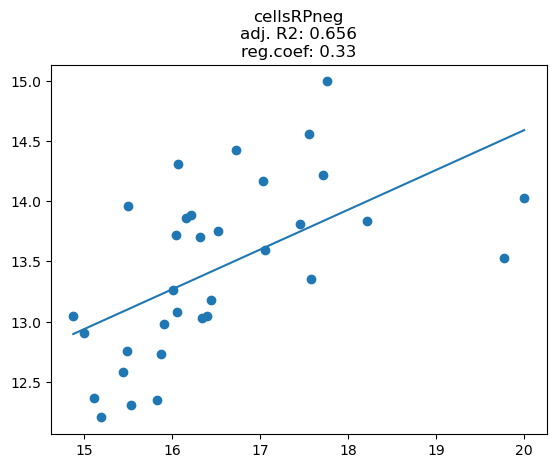

cellsRPposGFstatus.csv


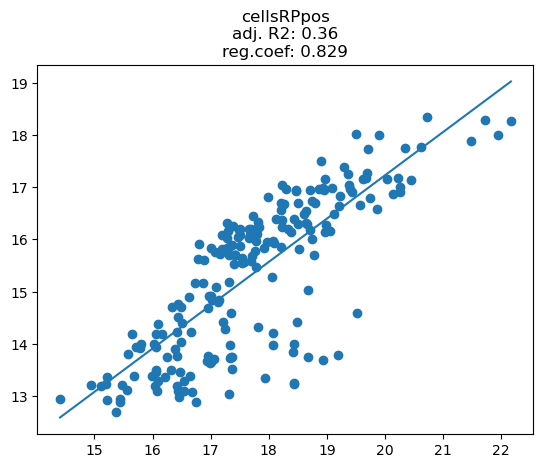

cellshilicnegGFstatus.csv


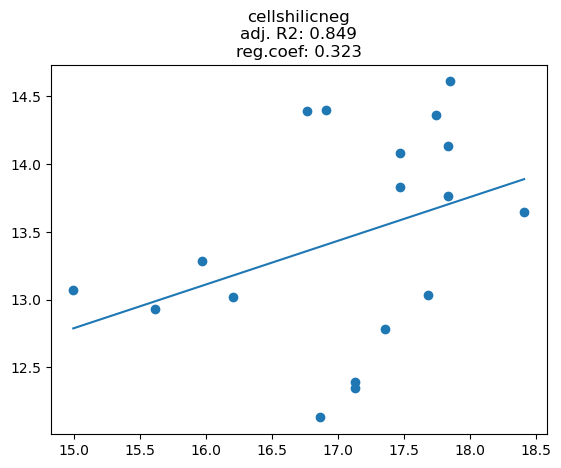

cellshilicposGFstatus.csv


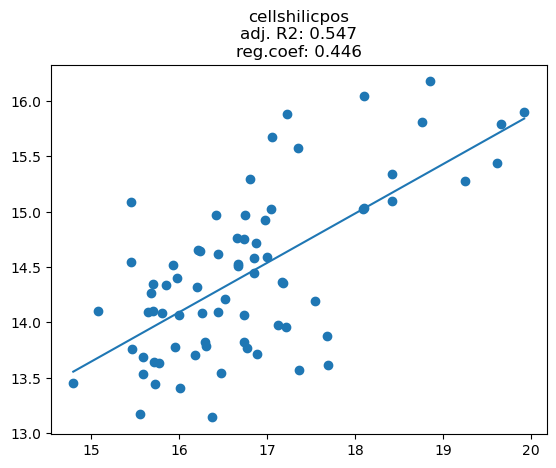

cellslipidnegGFstatus.csv


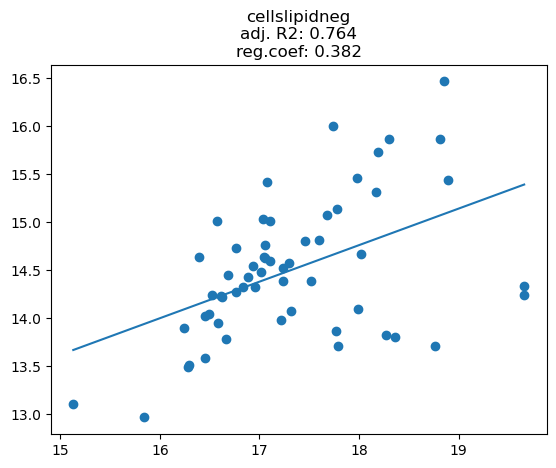

cellslipidposGFstatus.csv


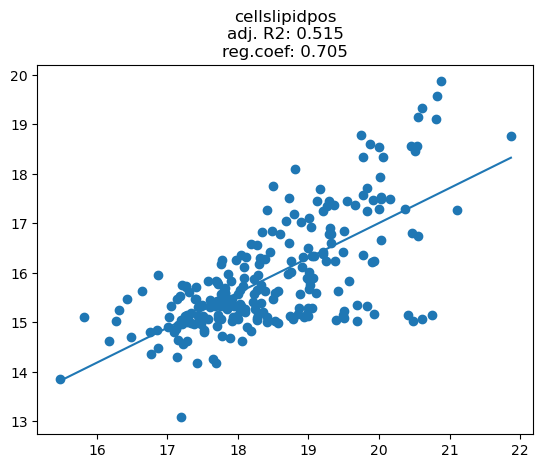

mediumRPnegGFstatus.csv


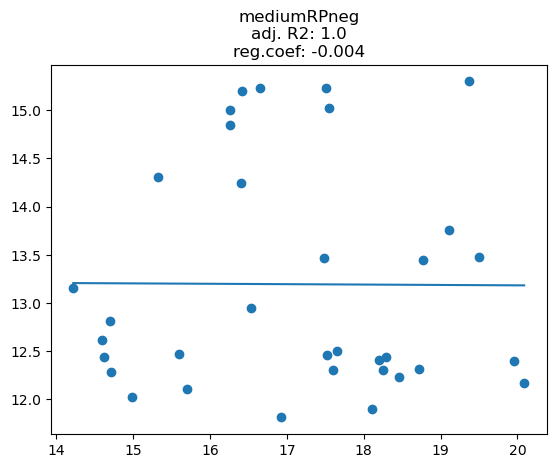

mediumRPposGFstatus.csv


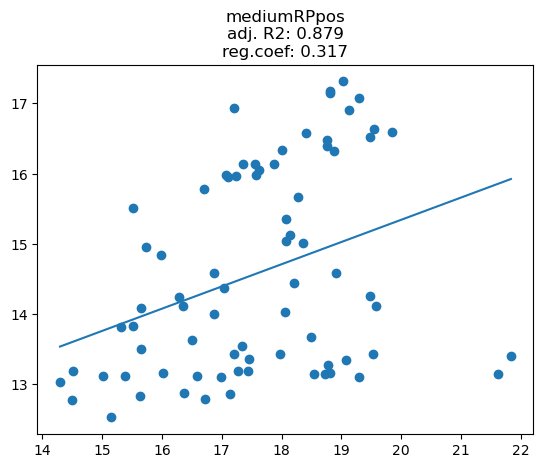

mediumhilicnegGFstatus.csv


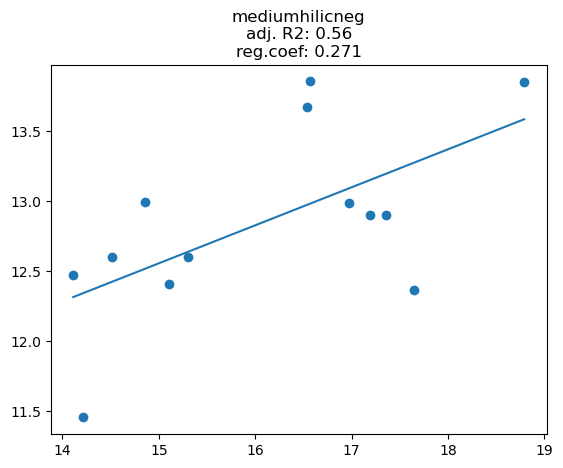

mediumhilicposGFstatus.csv


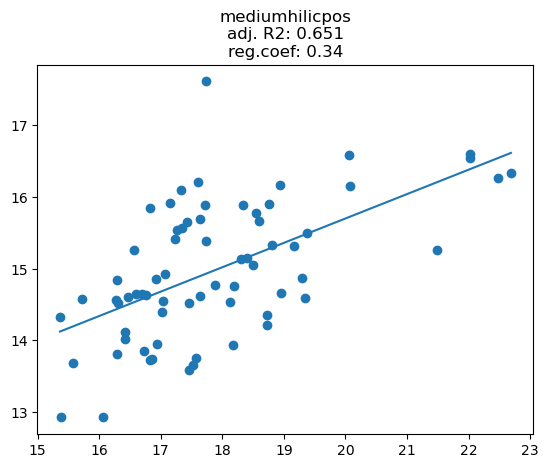

In [715]:
tags=['aSYN','comb','IFNg','UT']
I=[np.arange(10),np.arange(10,20),np.arange(20,30),np.arange(30,40)]

for fnum in range(10):
    pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
    filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
    print(filenamesGF[fnum])
    data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

    fname = filenamesGF[fnum].split('GF')[0]

    Area=data.iloc[3:,8:48].to_numpy(dtype=float)
    Noise=data.iloc[3:,88:128].to_numpy(dtype=int)==32
    Noise=np.asarray(Noise, dtype=int)

    noiseless_mean, noisy_mean = [], []#np.zeros((Noise.shape[0],4)), np.zeros((Noise.shape[0],4))
    for feat in range(Noise.shape[0]):
        area = Area[feat,:]
        nless=area[np.where(Noise[feat,:]==0)[0]]
        n=area[np.where(Noise[feat,:]==1)[0]]

        if(len(n)<=2 or len(nless)<=5):
            continue

        noiseless_mean.append(nless.mean())
        noisy_mean.append(n.mean())

    noiseless_mean=np.asarray(noiseless_mean)
    noisy_mean=np.asarray(noisy_mean)

    xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
    yy=noisy_mean
    bb=np.linalg.inv(xx.T@xx)@xx.T@yy

    yhat=xx@bb
    N, p=len(yy), 2
    SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
    SST=(yy- yy.mean()).T@(yy - yy.mean())
    R2=1 - SSR*(N-1)/(SST*(N-p-1))

    xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
    ypred=xxx@bb

    plt.scatter(noiseless_mean, noisy_mean)
    plt.plot(xxx[:,1],ypred)
    plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
    plt.show()

cellsRPnegGFstatus.csv


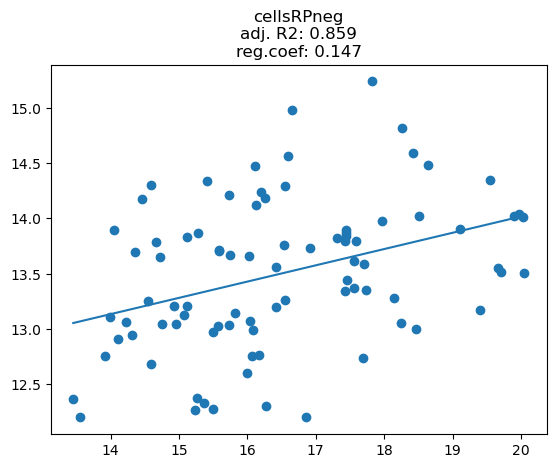

cellsRPposGFstatus.csv


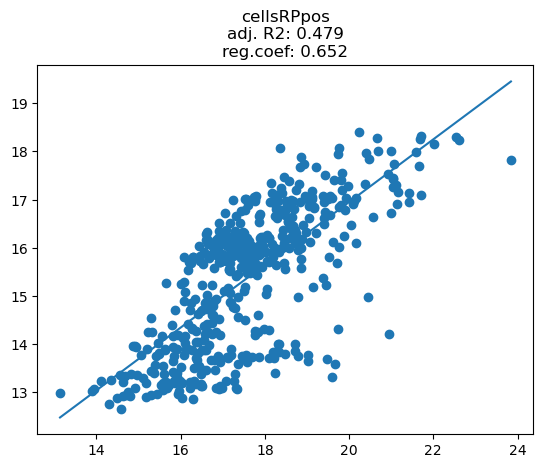

cellshilicnegGFstatus.csv


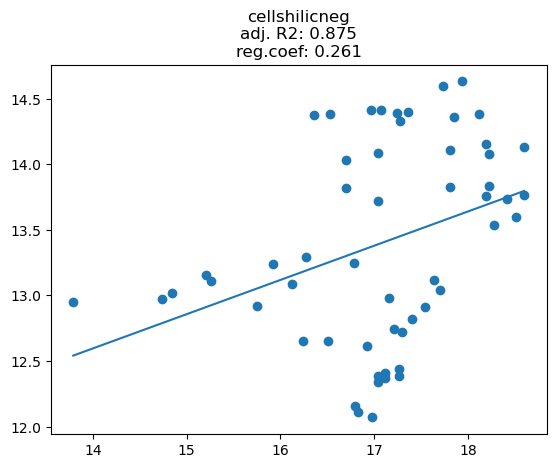

cellshilicposGFstatus.csv


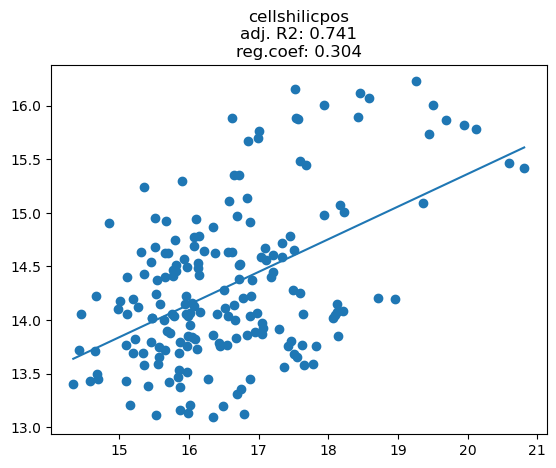

cellslipidnegGFstatus.csv


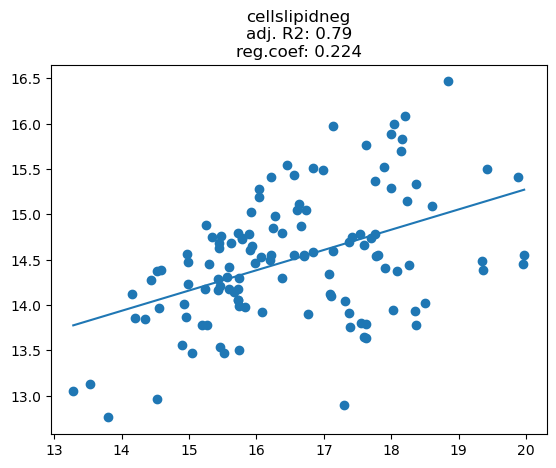

cellslipidposGFstatus.csv


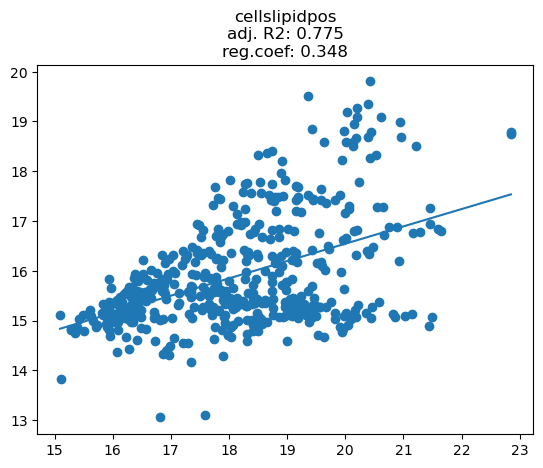

mediumRPnegGFstatus.csv


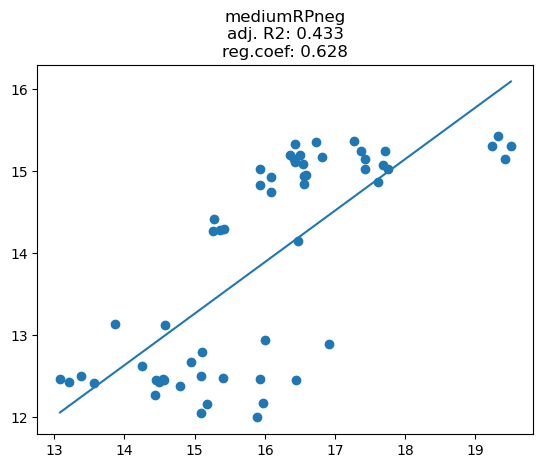

mediumRPposGFstatus.csv


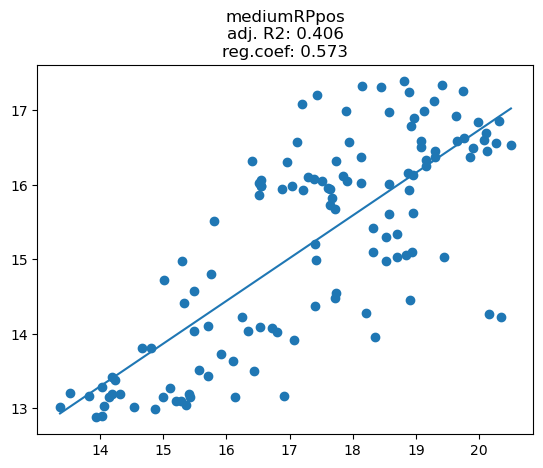

mediumhilicnegGFstatus.csv


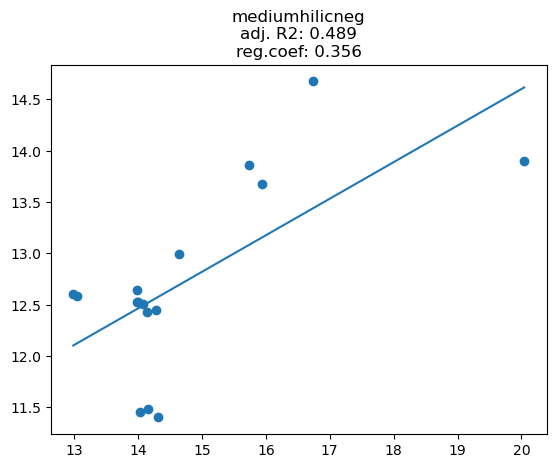

mediumhilicposGFstatus.csv


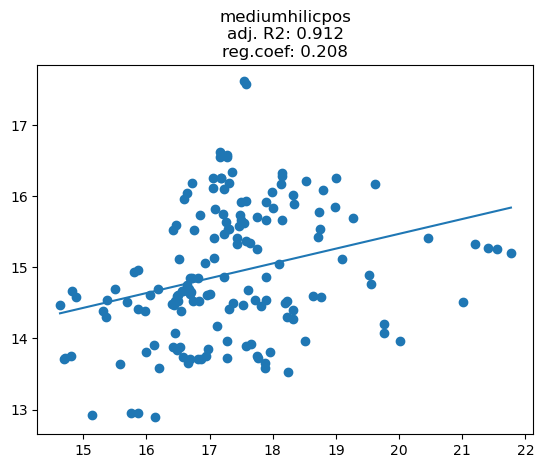

In [706]:
tags=['aSYN','comb','IFNg','UT']
I=[np.arange(10),np.arange(10,20),np.arange(20,30),np.arange(30,40)]

for fnum in range(10):
    pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
    filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
    print(filenamesGF[fnum])
    data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

    fname = filenamesGF[fnum].split('GF')[0]

    Area=data.iloc[3:,8:48].to_numpy(dtype=float)
    Noise=data.iloc[3:,88:128].to_numpy(dtype=int)==32
    Noise=np.asarray(Noise, dtype=int)

    noiseless_mean, noisy_mean = [], []#np.zeros((Noise.shape[0],4)), np.zeros((Noise.shape[0],4))
    g = []

    for feat in range(Noise.shape[0]):
        t=0
        for inds in I:
            area = Area[feat,inds]
            nless=area[np.where(Noise[feat,inds]==0)[0]]
            n=area[np.where(Noise[feat,inds]==1)[0]]

            if(len(n)<=1 or len(nless)<=1):
                continue

            #noiseless_mean[feat, group]=nless_m
            #noisy_mean[feat, group]=n_m
            noiseless_mean.append(nless.mean())
            noisy_mean.append(n.mean())
            g.append(t)
            t+=1

    noiseless_mean=np.asarray(noiseless_mean)
    noisy_mean=np.asarray(noisy_mean)
    g=np.array(g)

    xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
    yy=noisy_mean
    bb=np.linalg.inv(xx.T@xx)@xx.T@yy

    yhat=xx@bb
    N, p=len(yy), 2
    SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
    SST=(yy- yy.mean()).T@(yy - yy.mean())
    R2=1 - SSR*(N-1)/(SST*(N-p-1))

    xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
    ypred=xxx@bb

    plt.scatter(noiseless_mean, noisy_mean)#,c=g)
    plt.plot(xxx[:,1],ypred)
    plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
    plt.show()

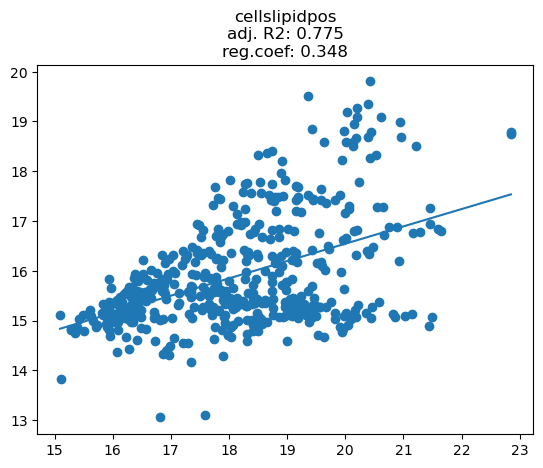

In [695]:
xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
yy=noisy_mean
bb=np.linalg.inv(xx.T@xx)@xx.T@yy

yhat=xx@bb
N, p=len(yy), 2
SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
SST=(yy- yy.mean()).T@(yy - yy.mean())
R2=1 - SSR*(N-1)/(SST*(N-p-1))

xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
ypred=xxx@bb

plt.scatter(noiseless_mean, noisy_mean)
plt.plot(xxx[:,1],ypred)
plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
plt.show()

# ---------------------------------------------------------------------------------------------------

In [483]:
cluster.shape

(40, 6)

In [484]:
k=2
arr1=cluster[:10,k]
arr2=cluster[10:20,k]
arr3=cluster[20:30,k]
arr4=cluster[30:,k]

In [485]:
eff, sample = bootstrapped_effect(arr2, arr4, it = 10000)

(array([3.000e+00, 8.000e+00, 3.000e+01, 9.500e+01, 2.940e+02, 5.860e+02,
        1.015e+03, 1.346e+03, 1.555e+03, 1.598e+03, 1.295e+03, 9.650e+02,
        5.950e+02, 3.610e+02, 1.350e+02, 8.400e+01, 2.400e+01, 8.000e+00,
        2.000e+00, 1.000e+00]),
 array([1.15869789, 1.27826172, 1.39782556, 1.5173894 , 1.63695324,
        1.75651708, 1.87608092, 1.99564476, 2.1152086 , 2.23477244,
        2.35433628, 2.47390012, 2.59346396, 2.7130278 , 2.83259164,
        2.95215548, 3.07171932, 3.19128315, 3.31084699, 3.43041083,
        3.54997467]),
 <BarContainer object of 20 artists>)

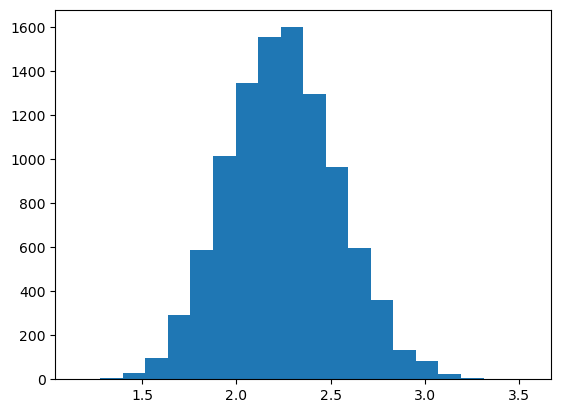

In [486]:
plt.hist(sample, bins=20)

### Clusters only using rtimes

In [76]:
dt=0.05
mask=np.asarray(np.abs(rtime-rtime.T)<=dt,dtype=int)
labels_mask=mask2assignments(mask)

In [77]:
inds=np.argsort(labels_mask)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_mask[inds]
luniq=np.unique(labels_mask[inds])

C:\Users\paavo\AppData\Local\Temp\ipykernel_10092\2760557883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['labels_complete']=labels_mask[inds]


In [89]:
k=luniq[10]
cluster_ind = np.where(labels_mask[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
#df_cluster = pd.DataFrame(cluster, columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(cluster_times)])
df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[1.709 1.752]


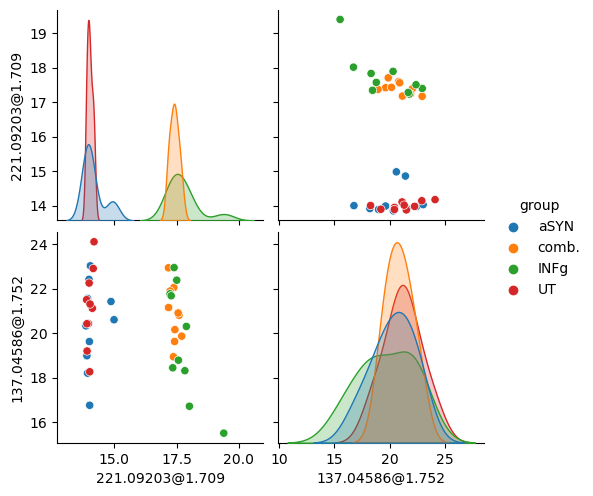

In [90]:
complete_pairplot(df_cluster, group_col='group')

In [91]:
mts, ps, ts, es = extract_pvalues(df_select,cluster_masstimes)
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, es, tle)

cellsRPposALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 10.0
-----------------------
Peak: 221.09203@1.709
P-values: [0.0, 0.0, 0.0, 1e-05]
Tests: ['comb.--UT', 'aSYN--comb.', 'aSYN--INFg', 'INFg--UT']
Effects: [3.39661, -3.260234, -3.601279, 3.737655]
-----------------------
Peak: 137.04586@1.752
P-values: []
Tests: []
Effects: []


## Designs

In [786]:
pd.from_dummies(pd.get_dummies(groups))

,
0,aSYN
1,aSYN
2,aSYN
3,aSYN
4,aSYN
5,aSYN
6,aSYN
7,aSYN
8,aSYN
9,aSYN


In [54]:
y=df_cluster.iloc[:,0].to_numpy(dtype=float)

In [55]:
design=make_oneWay_design(groups)
X_d=design[0]

In [56]:
β = np.linalg.inv(X_d.T@X_d)@X_d.T@y

In [57]:
β

array([18.60557497, 15.3412465 , 15.34414239, 18.22346236])

In [76]:
# 4-way contrast (model for means)
C = np.array(
    [[1,-1,0,0],
     [1,0,-1,0],
     [1,0,0,-1],
     [0,1,-1,0],
     [0,1,0,-1],
     [0,0,1,-1]]
)
C

array([[ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 1,  0,  0, -1],
       [ 0,  1, -1,  0],
       [ 0,  1,  0, -1],
       [ 0,  0,  1, -1]])

In [75]:
C@β

array([ 3.26432847e+00,  3.26143258e+00,  3.82112611e-01, -2.89588873e-03,
       -2.88221586e+00, -2.87931997e+00])

Effects: [-2.87932, -3.261433, 2.882216, 3.264328]
Effects: [-1.327142, -1.673992, 1.363784, 1.710634]
Effects: [-1.188941, -1.632026, 1.248197, 1.691282]

## ANOVA

In [738]:
from statsmodels.formula.api import ols
from scipy.stats import t

In [747]:
def dof_estimate(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2

    return (s1 + s2)**2 / (s1**2/(n1-1) + s2**2/(n2-1))
    
def t_stat(x1,x2):
    n1, n2 = len(x1), len(x2)
    m1, m2 = x1.mean(), x2.mean()
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2
    
    return (m1 - m2) / np.sqrt(s1 + s2)

def t_test(x1, x2):
    # p-value for 2-sided test
    tstat = t_stat(x1, x2)
    dof = dof_estimate(x1,x2)
    
    return 2*(1 - t.cdf(abs(tstat), dof)), tstat, dof

In [716]:
data =data_significant.iloc[sorted_ind+3,:] 
X=data.iloc[:,8:48].to_numpy(dtype=float).T

In [776]:
k=19
design = make_oneWay_design(groups)
M=design[0]
inds=np.array([i for i in range(40) if i not in range(10,30)])
ydata=X[inds,k]

In [777]:
groups.iloc[inds]

8     aSYN
9     aSYN
10    aSYN
11    aSYN
12    aSYN
13    aSYN
14    aSYN
15    aSYN
16    aSYN
17    aSYN
38      UT
39      UT
40      UT
41      UT
42      UT
43      UT
44      UT
45      UT
46      UT
47      UT
Name: 0, dtype: object

In [778]:
t_test(ydata[:10],ydata[10:20])

(0.9123594390458716, -0.11212773838913989, 13.60683722188934)

In [779]:
M[:,2]=1
M=M[:20,2:]
M

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [780]:
β = np.linalg.inv(M.T@M)@M.T@ydata

In [781]:
β

array([18.84783691,  0.02420916])

In [782]:
print(data.iloc[k,0])
xdata = pd.DataFrame(np.hstack((X[inds,k][:,np.newaxis],labels[inds,np.newaxis])), columns=['area','group'])
res = ols(formula="area~1 + C(group)", data=xdata).fit()
res.summary()

nan


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                   0.01257
Date:                Wed, 21 Jun 2023   Prob (F-statistic):              0.912
Time:                        17:25:02   Log-Likelihood:                -12.761
No. Observations:                  20   AIC:                             29.52
Df Residuals:                      18   BIC:                             31.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.8720      0.153    123.614      0.000      18.551      19.193
C(group)[T.2.0]    -0.0242      0.216     -0.112      0.912      -0.478       0.429
==============================================================================
Omnibus:                        4.086   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.558
Skew:                          -0.869   Prob(JB):                        0.278
Kurtosis:                       3.226   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
res.tvalues

C(group)[0.0]    85.574404
C(group)[1.0]    79.604158
C(group)[2.0]    77.699851
C(group)[3.0]    86.891238
dtype: float64

In [216]:
I1=np.ones((3,1))
I2=np.ones((3,1))
I3=np.ones((2,1))
I4=np.ones((4,1))
Z=np.zeros((12,1))

In [84]:
M=np.array([[1,0,1,0],[1,0,0,0],[1,1,1,1],[1,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 0]])

In [85]:
M.T@M

array([[4, 2, 2, 1],
       [2, 2, 1, 1],
       [2, 1, 2, 1],
       [1, 1, 1, 1]])

In [86]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [91]:
M=np.array([[1,0,1,0],[1,0,0,0],[0,1,1,1],[0,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0]])

In [92]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [87]:
from sympy import *

In [93]:
y1,y2,y3,y4=symbols('y1 y2 y3 y4')

In [94]:
Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[y1],
[y2],
[y3],
[y4]])

In [95]:
np.linalg.inv(M.T@M)@M.T@Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[                            1.0*y2],
[                            1.0*y4],
[                   1.0*y1 - 1.0*y2],
[-1.0*y1 + 1.0*y2 + 1.0*y3 - 1.0*y4]])